# Unsupervised learning - Project (Vehicle silhouette)

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading and observing the data

*Data skimmed through to see what are the variables present, data type, shape, column names, mixed data types, missing values etc*

In [2]:
dataset = pd.read_csv('vehicle-1.csv')
dataset.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [4]:
print(dataset.isna().values.any())
print(dataset.isnull().values.any())

True
True


There are missing values in the data that have to be treated.

In [5]:
dataset.shape

(846, 19)

In [6]:
dataset['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

Observations - 

Data contains some missing values. There are 19 columns with class being the target variable. The data contains sample bias with more samples on cars than buses and vans. All the columns are int/float type except for the target column which is object type.

## Exploratory data analysis

#### Five Point summary

In [7]:
dataset.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

#### Univariate Analysis

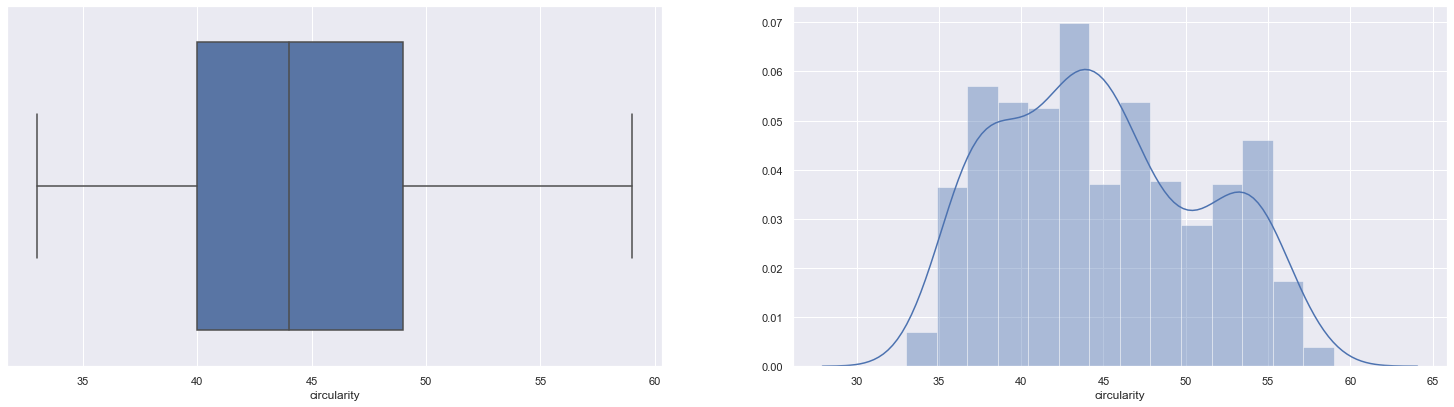

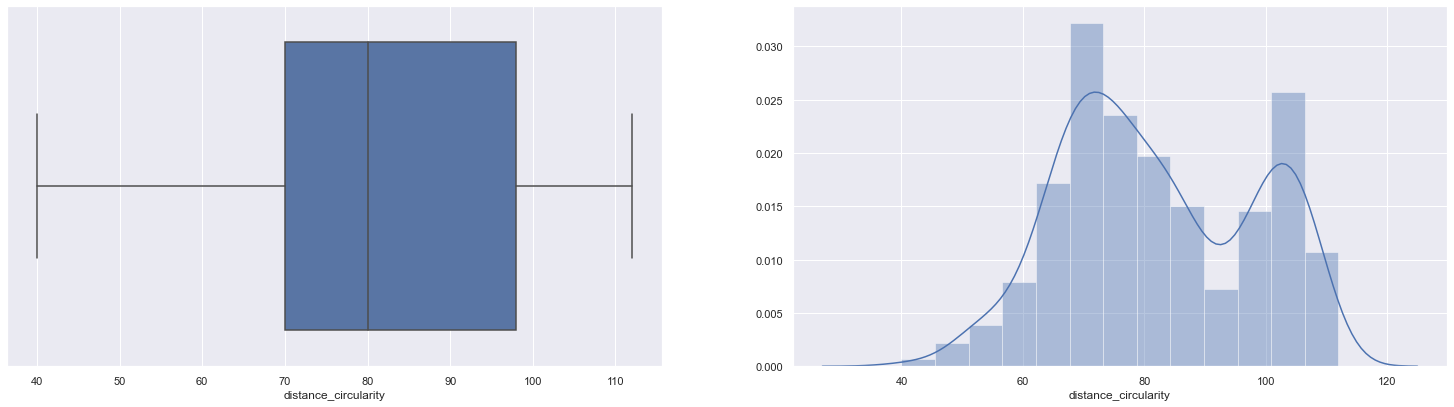

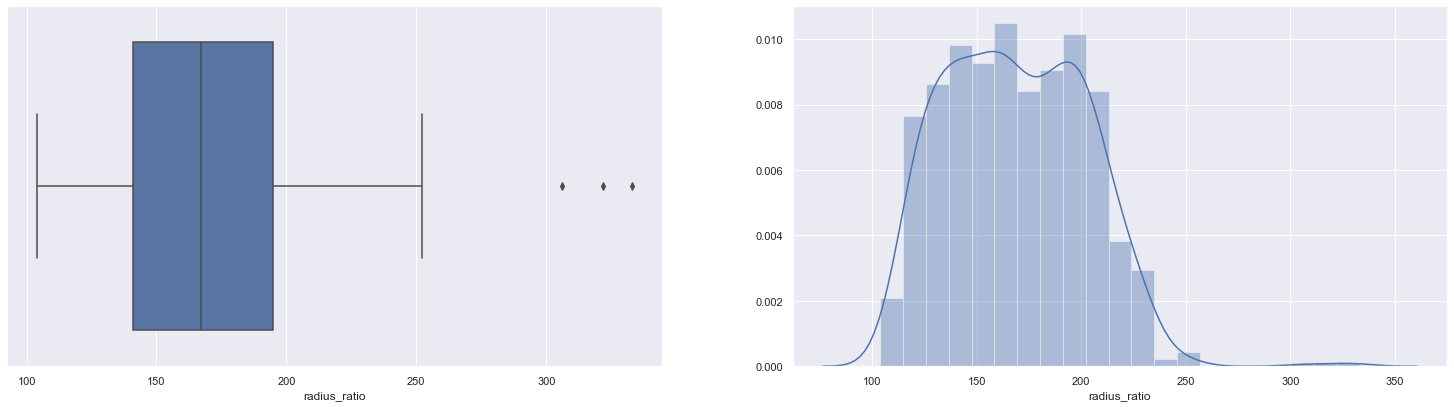

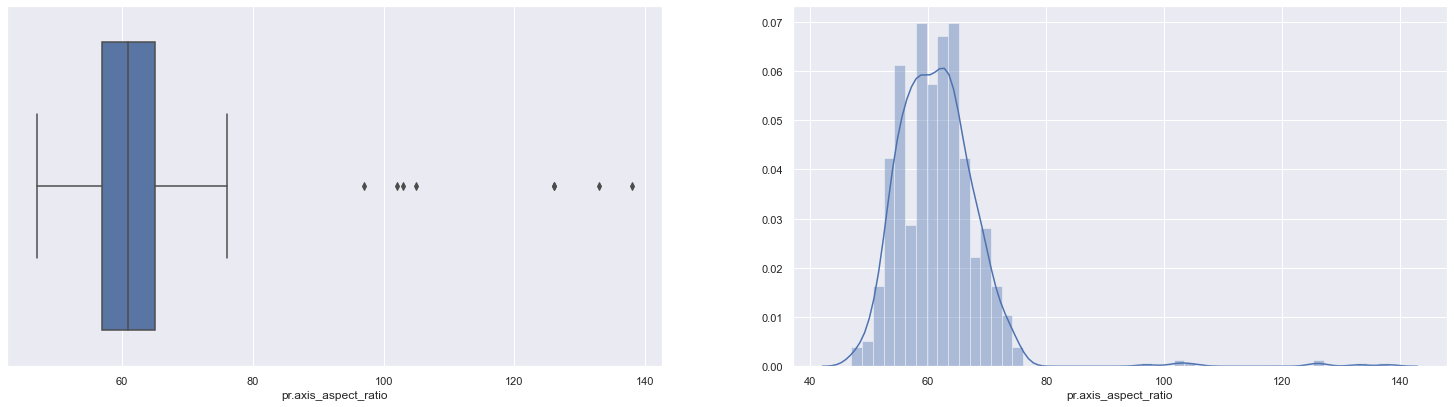

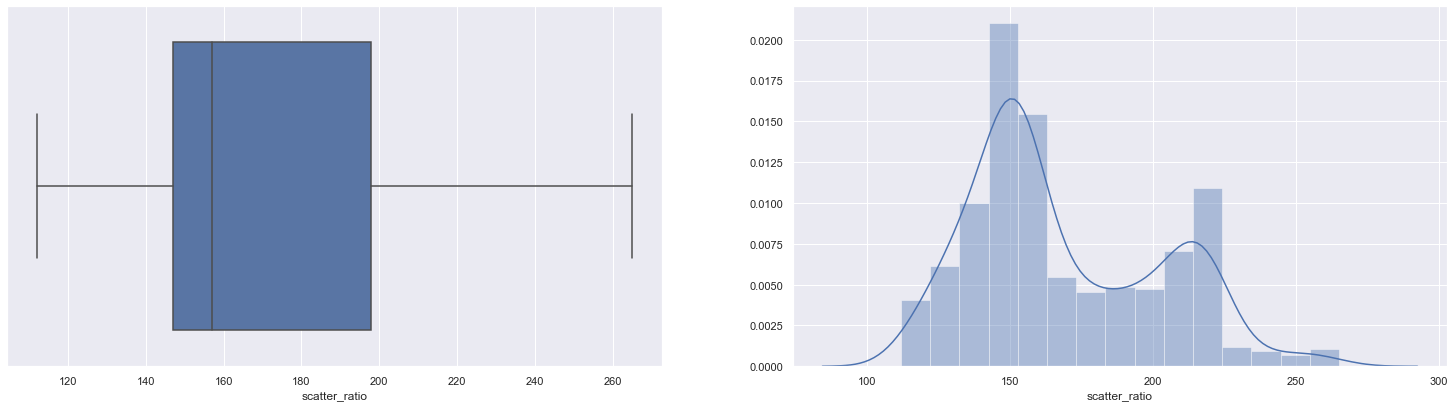

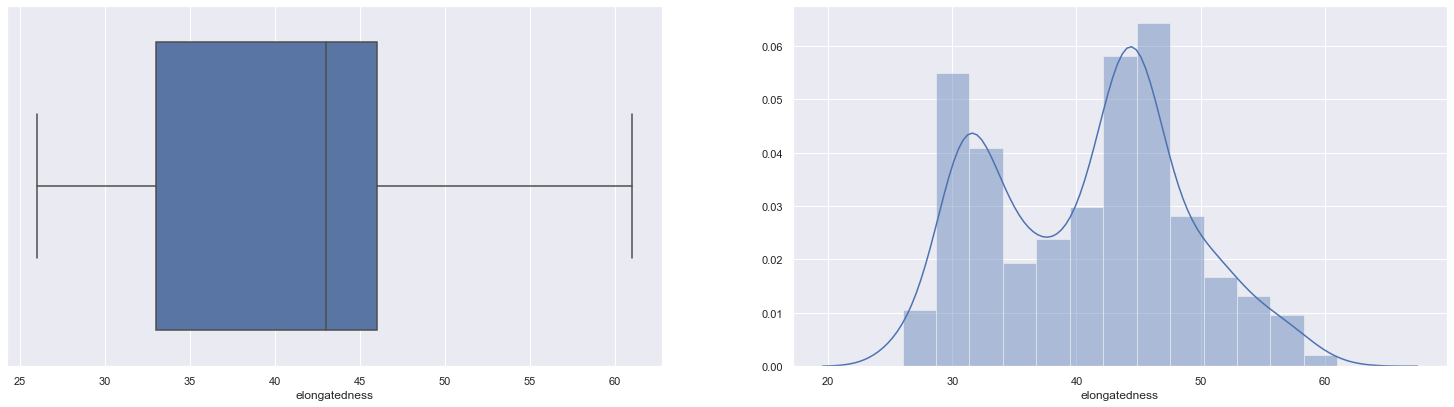

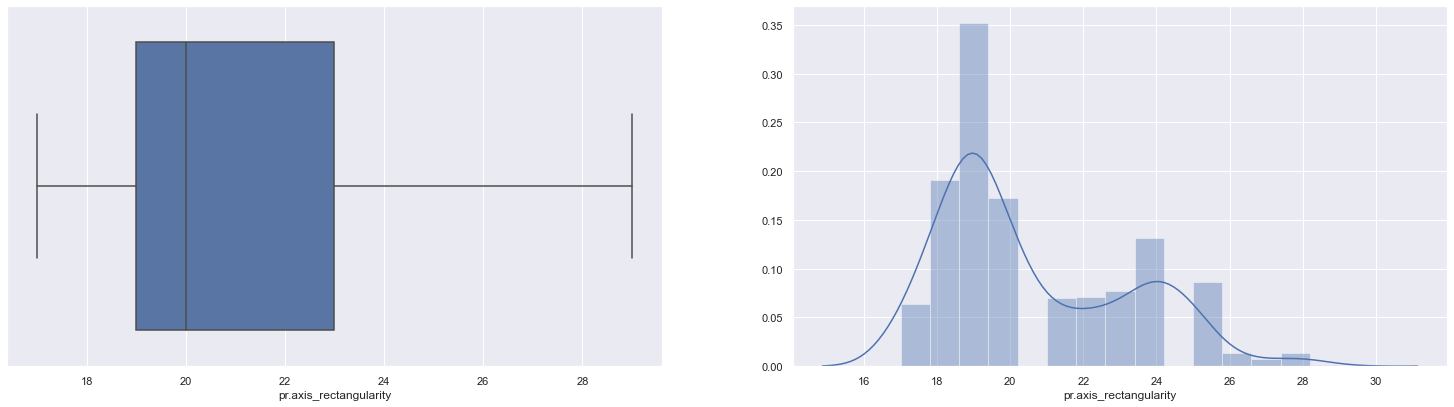

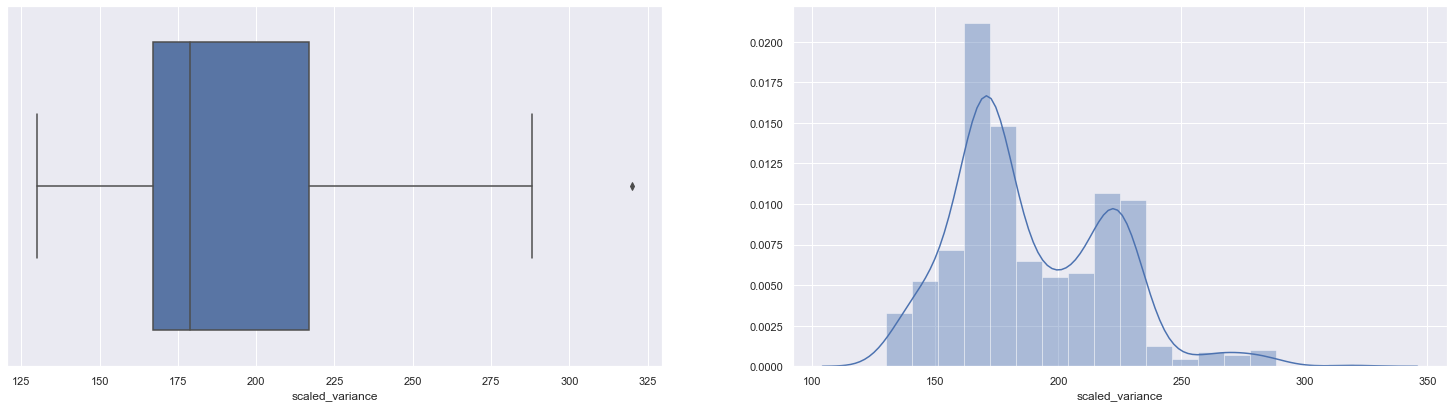

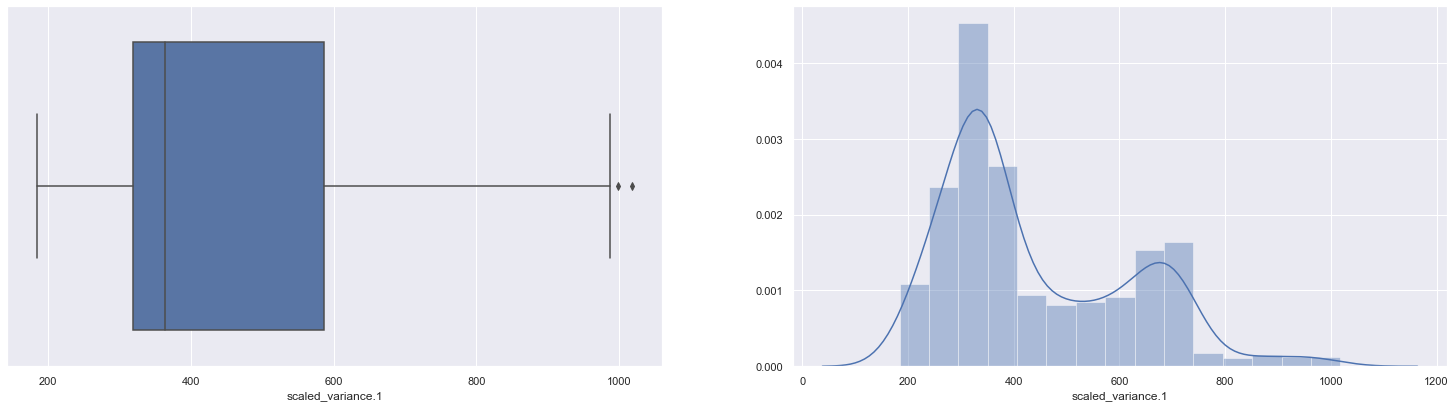

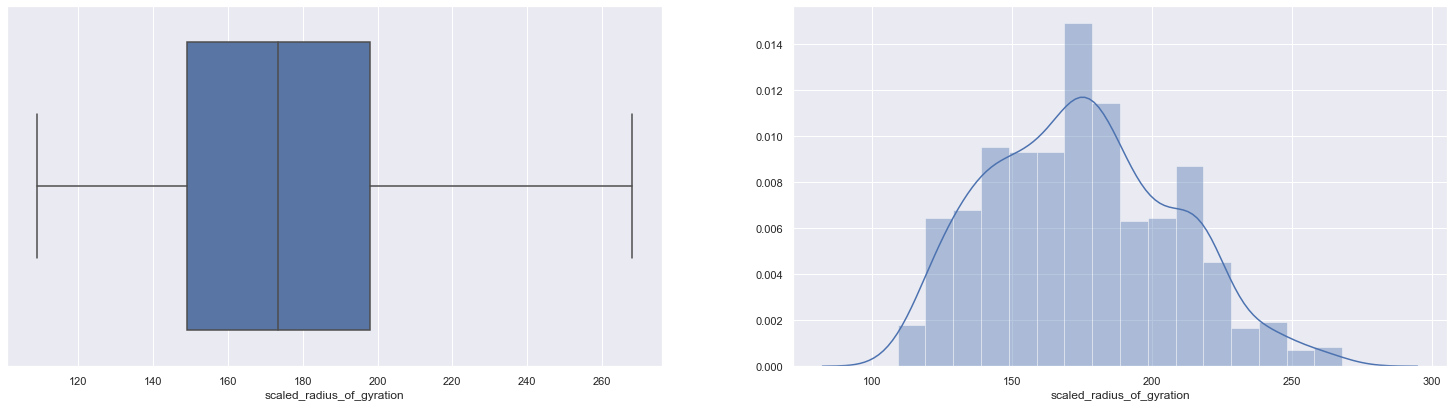

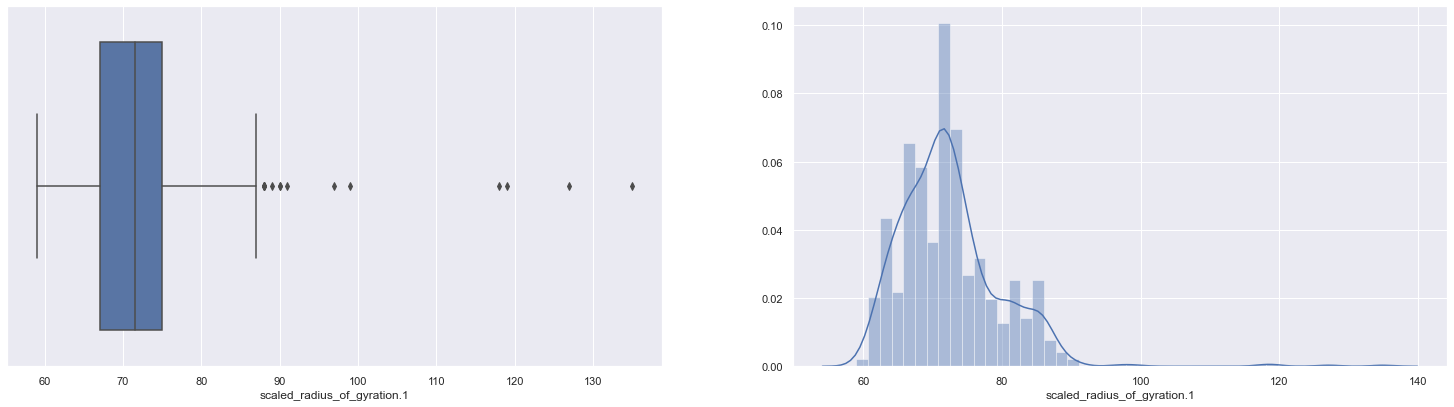

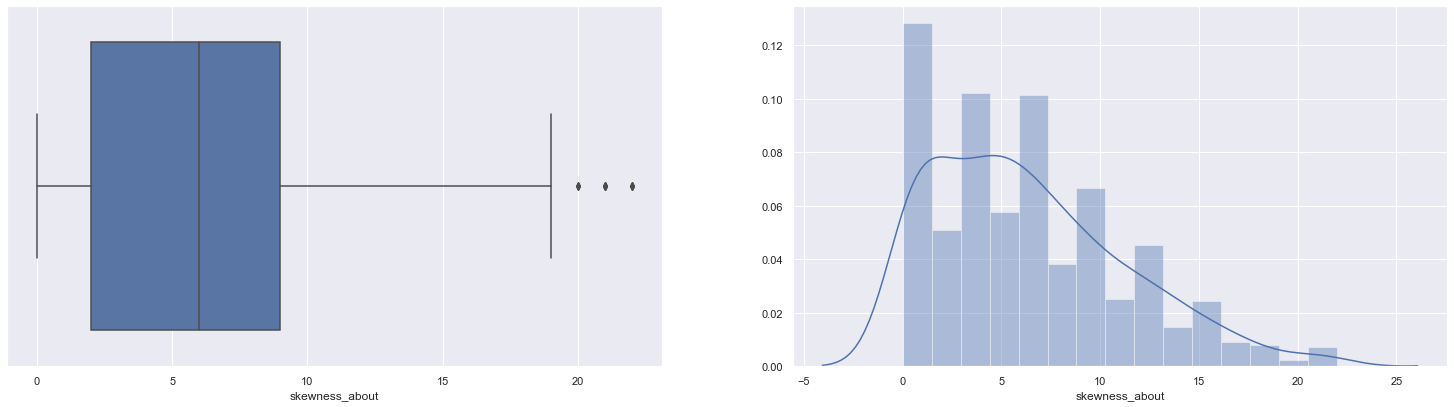

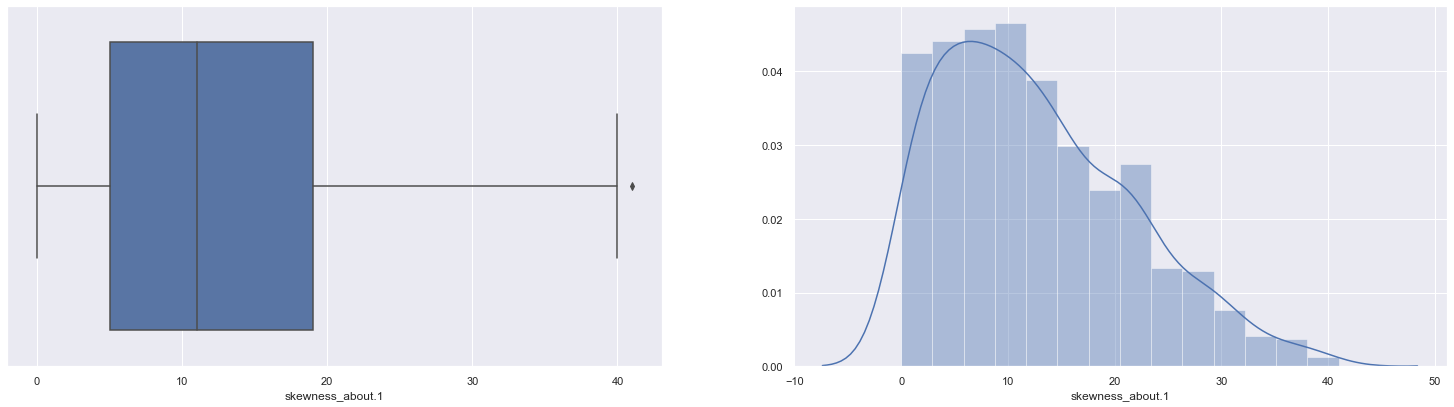

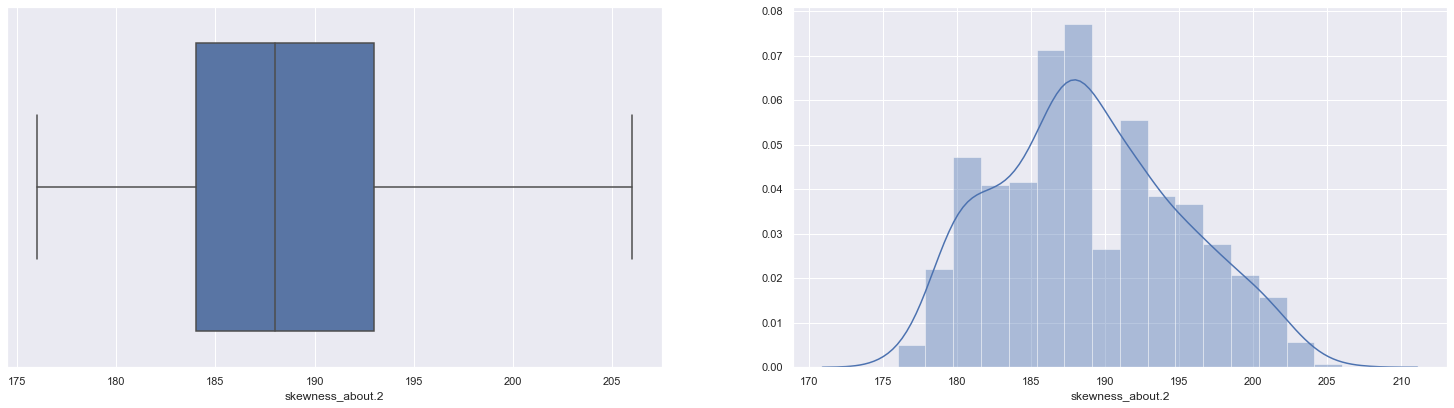

In [8]:
def univariate_plots(Source):
    a = pd.Series(Source.select_dtypes(include=['float64']).columns)
    leng = len(a)
    for j in range(0,len(a)):
        plt.Text('Figure for float64')
        f, axes = plt.subplots(1, 2, figsize=(10, 10))
        sns.boxplot(Source[a[j]], ax = axes[0])
        sns.distplot(Source[a[j]], ax = axes[1])
        plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

univariate_plots(dataset)

**Observations from the Univariate analysis -** 

* **compactness** - no outliers in compactness column and it's looks like normally distributed
* **circularity** - no outliers in circularity column and it's looks like normally distributed
* **distance_circularity** - no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median)
* **radius_ratio** - there are outliers in radius_ratio column and there is right skewness because long tail is at the right side(mean>median)
* **pr.axis_aspect_ratio** - there are outliers in pr.axis_aspect_ratio column and there is right skewness because long tail is at right side(mean>median)
* **max.length_aspect_ratio** - there are outliers in max.length_aspect_ratio and there is a right skewness because long tail is at right side(mean>median)
* **scatter_ratio** - no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)
* **elongatedness** - no outliers in elongatedness column and there are two peaks in distribution plot and there is left skewness because long tail is at left side(mean<median)
* **pr.axis_rectangularity** - no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)
* **max.length_rectangularity** - no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)
* **scaled_variance** - there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)
* **scaled_variance.1** - there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)
* **scaled_radius_of_gyration** - no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side(mean>median)
* **scaled_radius_of_gyration.1** - there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side(mean>median)
* **skewness_about** - there are outliers in skewness_about column and there is right skewness because long tail is at right side(mean>median)
* **skewness_about.1** - there are outliers in skewness_about.1 column and there is right skewness because long tail is at right side(mean>median)
* **skewness_about.2** - no outliers in skewness_about.2 column and there is left skewness because long tail is at left side(mean<median)
* **hollows_ratio** - no outliers in hollows_ratio column and there is left skewness because long tail is at left side(mean<median) 


#### Bivariate Analysis

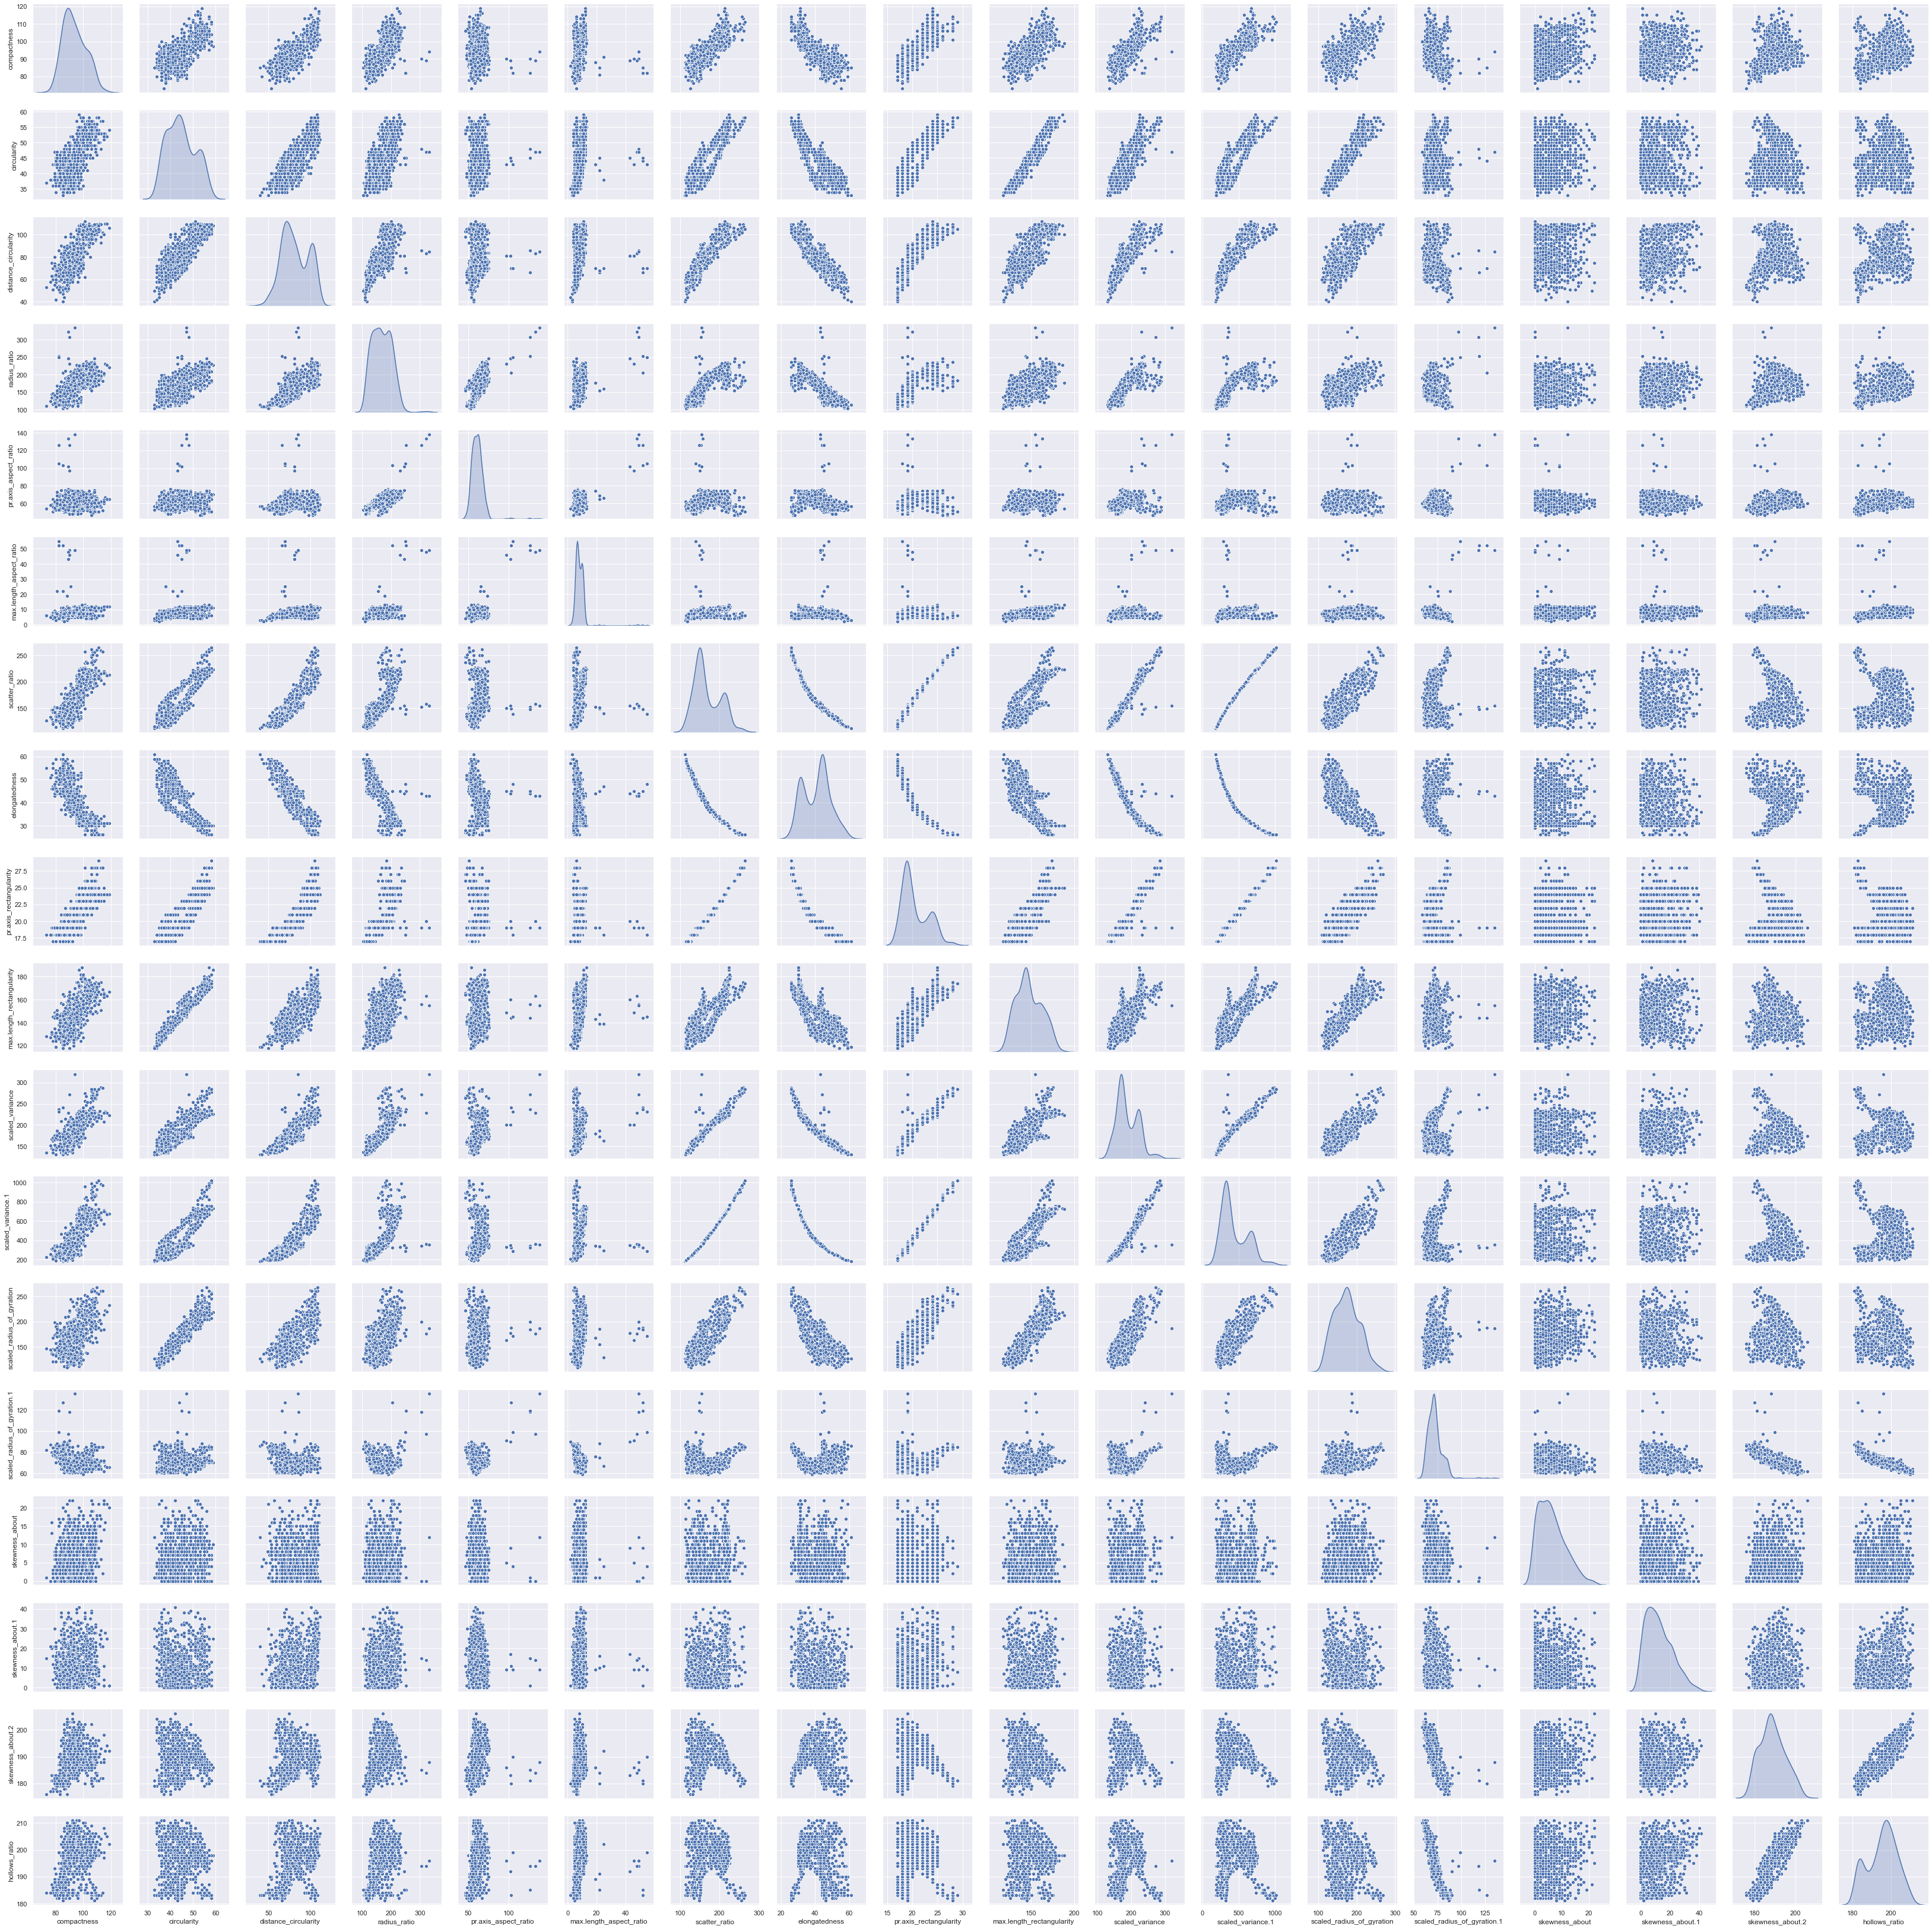

In [9]:
temp_df = dataset.drop(['class'], axis='columns')
sns.pairplot(temp_df, diag_kind='kde')

We can observe from the pairplots that many columns are correlated and many columns have long tail so that is the indication of outliers.
The degree of correlation will be estalished in the **correlation matrix** below.


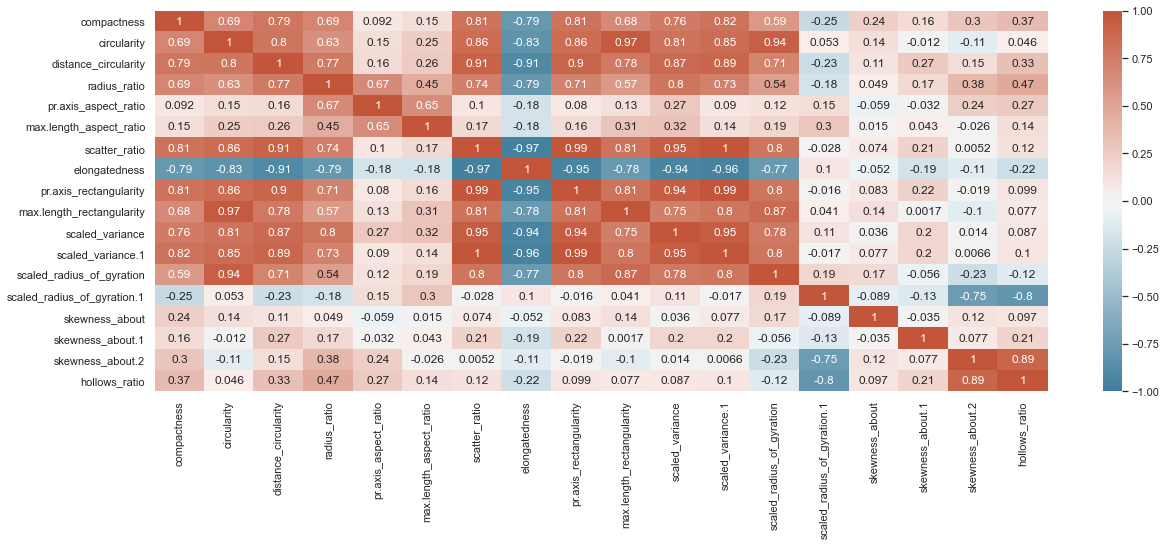

In [10]:
def EDA_Corr(df):
        """This gives output as Covariance matrix and feature wise uniquess i.e how much its statistically
        independent. This is done with default range of corr between +0.5 to -0.6"""
        corr = df.corr()
        index = corr.columns
        Output = []
        for i in range(0,len(index)):
            i = index[i]
            Pos = corr.index[(corr[i] >= 0.5)].tolist()
            No = corr.index[(corr[i] < 0.5) & (corr[i] > -0.6)].tolist()
            Neg = corr.index[(corr[i] <= -0.5)].tolist()
            leng_u = len(No)
            leng_pos = len(Pos)
            leng_neg = len(Neg)
            Out = [i, leng_u, leng_pos, leng_neg, Pos, Neg, No]
            Output.append(Out)
        fig, ax = plt.subplots(figsize=(20,7)) 
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap=cmap, linewidths=0, ax = ax)
EDA_Corr(dataset)

From above correlation matrix we can see that there are many features which are highly correlated. If we observe carefully then scaled_variance.1 and scatter_ratio has correlation coeff of 1 and many other features also there which are having more than 0.9 correlation. In these cases we will exclude these columns where correlation is +-0.9 or above. 

So there are 8 such columns: 
* max.length_rectangularity
* scaled_radius_of_gyration
* skewness_about.2 
* scatter_ratio 
* elongatedness 
* pr.axis_rectangularity 
* scaled_variance 
* scaled_variance.1

We can safely remove these columns from the list of predictors and still achieve a very high rate of success

#### Target column distribution

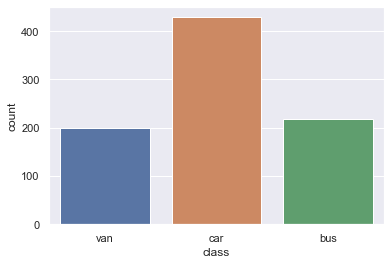

In [11]:
sns.countplot(dataset['class'])

From above we can see that cars are most followed by bus and then vans

## Feature Engineering

This is a data preprocessing step that includes :-
* Treating missing values
* Treating outliers
* Changing the 'class' column to numerical categories
* Dropping highly correlated columns 

#### Treating missing values

In [12]:
print(dataset.isna().values.any())
print(dataset.isnull().values.any())

True
True


In [13]:
dataset[dataset.isna().values == True].shape

(41, 19)

We see that there are a total of 41 rows with missing values in the datasets. 

One method can be to simply drop these data points, but can we do better?

The Approach we will follow to fill missing values is that we will replace the nan value with the median value of that column. One additional step that we will take here is that we will be slicing the entire dataset into 3 categorical divisions - car, van and bus.
This will allow us to get finer medians for every column

In [14]:
lst = ['car', 'van', 'bus']
for item in lst:
    print('There were {} missing rows for dataset class type {}'.format( 
          dataset[dataset['class'] == item][dataset[dataset['class'] == item].isna().values == True].shape[0], item))
    
    dataset[dataset['class'] == item] = dataset[dataset['class'] == item].fillna(dataset[dataset['class'] == item]
                                                                                   .median())
    print()
    print('After replacing with median there are {} missing rows for dataset class type {}'.format(
         dataset[dataset['class'] == item][dataset[dataset['class'] == item].isna().values == True].shape[0], item))
    print('-------------------------------------------------------------------------------------')

There were 19 missing rows for dataset class type car

After replacing with median there are 0 missing rows for dataset class type car
-------------------------------------------------------------------------------------
There were 4 missing rows for dataset class type van

After replacing with median there are 0 missing rows for dataset class type van
-------------------------------------------------------------------------------------
There were 18 missing rows for dataset class type bus

After replacing with median there are 0 missing rows for dataset class type bus
-------------------------------------------------------------------------------------


In [15]:
print(dataset.isna().values.any())
print(dataset.isnull().values.any())

False
False


No missing value in the dataset anymore

#### Treating outliers

In [16]:
cols_with_outliers = ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance',
                     'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']
for col in cols_with_outliers:
    print('For column:', col)
    q1 = np.quantile(dataset[col],0.25)
    q2 = np.quantile(dataset[col],0.50)
    q3 = np.quantile(dataset[col],0.75)
    IQR = q3-q1
    print("Quartie1::",q1)
    print("Quartie2::",q2)
    print("Quartie3::",q3)
    print("Inter Quartie Range::",IQR)
    thresh = dataset[col].quantile(0.75)+(1.5 * IQR)
    print(col, "above", dataset[col].quantile(0.75)+(1.5 * IQR),"are outliers")
    print('The Outliers in', col,'column are', dataset[dataset[col]>thresh][col].shape[0])
    print()

For column: radius_ratio
Quartie1:: 141.0
Quartie2:: 167.25
Quartie3:: 195.0
Inter Quartie Range:: 54.0
radius_ratio above 276.0 are outliers
The Outliers in radius_ratio column are 3

For column: pr.axis_aspect_ratio
Quartie1:: 57.0
Quartie2:: 61.0
Quartie3:: 65.0
Inter Quartie Range:: 8.0
pr.axis_aspect_ratio above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 8

For column: max.length_aspect_ratio
Quartie1:: 7.0
Quartie2:: 8.0
Quartie3:: 10.0
Inter Quartie Range:: 3.0
max.length_aspect_ratio above 14.5 are outliers
The Outliers in max.length_aspect_ratio column are 12

For column: scaled_variance
Quartie1:: 167.0
Quartie2:: 179.0
Quartie3:: 217.0
Inter Quartie Range:: 50.0
scaled_variance above 292.0 are outliers
The Outliers in scaled_variance column are 1

For column: scaled_variance.1
Quartie1:: 318.25
Quartie2:: 364.0
Quartie3:: 586.75
Inter Quartie Range:: 268.5
scaled_variance.1 above 989.5 are outliers
The Outliers in scaled_variance.1 column are 2

For co

In [17]:
cols_with_outliers = ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance',
                     'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']
for col in cols_with_outliers:
    q1 = np.quantile(dataset[col],0.25)
    q2 = np.quantile(dataset[col],0.50)
    q3 = np.quantile(dataset[col],0.75)
    IQR = q3-q1
    thresh = dataset[col].quantile(0.75)+(1.5 * IQR)
    dataset.drop(dataset[dataset[col]>thresh].index, axis=0, inplace=True)

In [18]:
#display the shape of data frame
print("after fixing outliers shape of dataframe:",dataset.shape)

after fixing outliers shape of dataframe: (814, 19)


After fixing the outliers, we have 814 dataset rows.

#### Changing target column to numerically categorical

In [19]:
le = LabelEncoder()
dataset['class'] = le.fit_transform(dataset['class'])

In [20]:
dataset['class'].unique()

array([2, 1, 0])

In [21]:
dataset.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
5             181.0            183      0

Labels - 

0 - bus, 
1 - car, 
2 - van 

In [22]:
## Changing the datatype of class to categorical
dataset["class"] = pd.Categorical(dataset["class"])

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  814 non-null    int64   
 1   circularity                  814 non-null    float64 
 2   distance_circularity         814 non-null    float64 
 3   radius_ratio                 814 non-null    float64 
 4   pr.axis_aspect_ratio         814 non-null    float64 
 5   max.length_aspect_ratio      814 non-null    int64   
 6   scatter_ratio                814 non-null    float64 
 7   elongatedness                814 non-null    float64 
 8   pr.axis_rectangularity       814 non-null    float64 
 9   max.length_rectangularity    814 non-null    int64   
 10  scaled_variance              814 non-null    float64 
 11  scaled_variance.1            814 non-null    float64 
 12  scaled_radius_of_gyration    814 non-null    float64 
 13  scale

Additionally changing the cols 'compactness', 'max.length_aspect_ratio', 'max.length_rectangularity' and 'hollows_ratio' to float for consistency

In [24]:
dataset['compactness'] = pd.Float64Index(dataset['compactness'])
dataset['max.length_aspect_ratio'] = pd.Float64Index(dataset['max.length_aspect_ratio'])
dataset['max.length_rectangularity'] = pd.Float64Index(dataset['max.length_rectangularity'])
dataset['hollows_ratio'] = pd.Float64Index(dataset['hollows_ratio'])

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  814 non-null    float64 
 1   circularity                  814 non-null    float64 
 2   distance_circularity         814 non-null    float64 
 3   radius_ratio                 814 non-null    float64 
 4   pr.axis_aspect_ratio         814 non-null    float64 
 5   max.length_aspect_ratio      814 non-null    float64 
 6   scatter_ratio                814 non-null    float64 
 7   elongatedness                814 non-null    float64 
 8   pr.axis_rectangularity       814 non-null    float64 
 9   max.length_rectangularity    814 non-null    float64 
 10  scaled_variance              814 non-null    float64 
 11  scaled_variance.1            814 non-null    float64 
 12  scaled_radius_of_gyration    814 non-null    float64 
 13  scale

#### Dropping highly correlated columns

In [26]:
#Input = dataset.drop()
cols_to_drop =['max.length_rectangularity','scaled_radius_of_gyration','skewness_about.2','scatter_ratio','elongatedness',
               'pr.axis_rectangularity','scaled_variance','scaled_variance.1']
input = dataset.drop(cols_to_drop, axis='columns')
input.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
5        107.0         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scaled_radius_of_gyration.1  \
0                  72.0                     10.0                         70.0   
1                  57.0                      9.0                         72.0   
2                  66.0                     10.0                         73.0   
3                  63.0                      9.0                         63.0   
5                  50.0                      6.0                         85.0   

   skewness_about  skewness_about.1  hollows_ratio class  
0             6.0              16.0          197.0     2  
1             9.0              14.0          199.0     2  
2            14.0               9.0          196.0     1  
3             6.0              10.0          207.0     2  
5             5.0               9.0          183.0     0

In [27]:
input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 845
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  814 non-null    float64 
 1   circularity                  814 non-null    float64 
 2   distance_circularity         814 non-null    float64 
 3   radius_ratio                 814 non-null    float64 
 4   pr.axis_aspect_ratio         814 non-null    float64 
 5   max.length_aspect_ratio      814 non-null    float64 
 6   scaled_radius_of_gyration.1  814 non-null    float64 
 7   skewness_about               814 non-null    float64 
 8   skewness_about.1             814 non-null    float64 
 9   hollows_ratio                814 non-null    float64 
 10  class                        814 non-null    category
dtypes: category(1), float64(10)
memory usage: 70.8 KB


## Splitting data into training and testing split

In this step we will split the data into training and testing set. We will keep the training size as 70%.

After splitting, we will also scale the independent variable

In [28]:
X = input.drop('class', axis = 'columns') 
y = input['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [29]:
print(X_train.shape)
print(X_test.shape)

(569, 10)
(245, 10)


##### Scaling

In [30]:
scale = StandardScaler()

In [31]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [32]:
X_train

array([[ 0.4335283 ,  0.09046435,  0.40511121, ...,  0.38065504,
        -0.07289588,  0.54560083],
       [-0.94246238, -1.22517061, -1.37881135, ..., -0.90095867,
        -0.51297815, -0.78279828],
       [ 0.93388854,  1.40609931,  0.59624577, ..., -0.26015181,
         0.14714526, -0.51711846],
       ...,
       [-0.31701207, -0.89626187,  0.08655361, ..., -1.32816323,
        -0.29293701, -0.25143864],
       [ 1.18406867,  1.73500806,  1.36078402, ..., -0.26015181,
         0.3671864 ,  0.01424119],
       [-1.56791269,  0.09046435, -0.86911919, ...,  0.16705275,
        -1.39314269, -0.91563819]])

In [33]:
y_train

128    2
87     2
448    0
729    1
440    1
      ..
742    1
795    2
76     1
248    1
39     0
Name: class, Length: 569, dtype: category
Categories (3, int64): [0, 1, 2]

## Training and evaluating SVM model

We will be using kernel as rbf

SVM model score (Training Data): 0.9982425307557118
SVM model score (Testing Data): 0.9673469387755103

SVC - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.98      0.97      0.98       119
           2       0.92      0.92      0.92        50

   micro avg       0.97      0.97      0.97       245
   macro avg       0.96      0.96      0.96       245
weighted avg       0.97      0.97      0.97       245



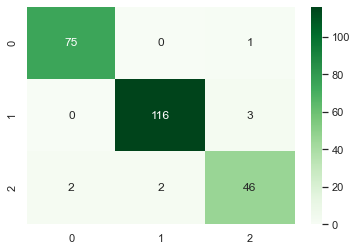

In [34]:
svm_model = SVC(C = 30, degree = 3, gamma = "auto", kernel = "rbf")
svm_model.fit(X_train, y_train)

svm_score_rbf_train = svm_model.score(X_train, y_train)
print('SVM model score (Training Data):', svm_score_rbf_train)

svm_score_rbf = svm_model.score(X_test, y_test)
print('SVM model score (Testing Data):', svm_score_rbf)

svm_pred = svm_model.predict(X_test)

print("\nSVC - Classification Report")
class_report = classification_report(y_test, svm_pred, labels=[0,1,2])
print(class_report)

sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, cmap='Greens',fmt='g')

rep = classification_report(y_test, svm_pred, labels=[0,1,2], output_dict=True)
prec_bus_svm = rep['0']['precision']
recall_bus_svm = rep['0']['recall']
prec_car_svm = rep['1']['precision']
recall_car_svm = rep['1']['recall']
prec_van_svm = rep['2']['precision']
recall_van_svm = rep['2']['recall']

## Getting the cross val score using K-Folds

In [35]:
X1 = X.copy()
y1 = y.copy()

In [36]:
X1 = scale.fit_transform(X1)
X1

array([[ 0.1694271 ,  0.52003877,  0.05472735, ..., -0.03794265,
         0.3792586 ,  0.17877968],
       [-0.32621948, -0.62360496,  0.11901027, ...,  0.61000103,
         0.15481912,  0.45079212],
       [ 1.2846319 ,  0.84679412,  1.53323456, ...,  1.68990715,
        -0.40627957,  0.04277346],
       ...,
       [ 1.53245519,  1.50030482,  1.21181995, ..., -0.68588632,
        -0.96737826,  0.72280457],
       [-0.9457777 , -1.44049334, -0.26668726, ..., -1.33383   ,
         1.38923624, -0.09323277],
       [-1.06968934, -1.44049334, -1.03808232, ..., -1.11784877,
         0.60369807, -0.77326388]])

In [37]:
## Using the cv = 10
scores = cross_val_score(svm_model, X1, y1, cv = 10)
scores

array([0.95121951, 0.98780488, 0.93902439, 0.92682927, 0.96341463,
       0.93902439, 0.96296296, 0.9382716 , 0.9382716 , 0.96202532])

In [38]:
svm_crossval_score_mean = scores.mean()
print('SVM classifier cross val mean score is:', svm_crossval_score_mean)

SVM classifier cross val mean score is: 0.9508848562465934


In [39]:
svm_crossval_score_std = scores.std()
print('SVM classifier cross val standard deviation is:', svm_crossval_score_std)

SVM classifier cross val standard deviation is: 0.017229006618959628


## Principal Component Analysis

In [40]:
dataset_pca = dataset.copy()
dataset_pca.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
5        107.0         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
5                  50.0                      6.0          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
5           26.0                    28.0                      169.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio class  
0             187.0          197.0     2  
1             189.0          199.0     2  
2             188.0          196.0     1  
3             199.0          207.0     2  
5             181.0          183.0     0

In [41]:
X_pca = dataset_pca.drop('class', axis='columns')
y_pca = dataset_pca['class']

In [42]:
X_pca = X_pca.apply(zscore)
X_pca.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.169427     0.520039              0.054727      0.318541   
1    -0.326219    -0.623605              0.119010     -0.854299   
2     1.284632     0.846794              1.533235      1.301191   
3    -0.078396    -0.623605             -0.009556     -0.283728   
5     1.656367    -0.133472              1.533235      0.128351   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.922333                 0.918743      -0.213836   
1             -0.740970                 0.430267      -0.608948   
2              0.857012                 0.918743       1.153861   
3              0.324351                 0.430267      -0.760915   
5             -1.983844                -1.035161       2.612738   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.146751               -0.228373                   0.760375   
1       0.534593               -0.618091                  -0.343898   
2      -1.146056                0.940782                   0.691358   
3       0.663874               -0.618091                  -0.343898   
5      -1.921740                2.889374                   1.450546   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397067          -0.349249                   0.293150   
1        -0.594149          -0.629466                  -0.507603   
2         1.146734           1.114742                   1.401885   
3        -0.922617          -0.749559                  -1.462347   
5         3.019004           2.956169                   2.757006   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.325508       -0.037943          0.379259   
1                    -0.002972        0.610001          0.154819   
2                     0.158296        1.689907         -0.406280   
3                    -1.454386       -0.037943         -0.294060   
5                     2.093516       -0.253924         -0.406280   

   skewness_about.2  hollows_ratio  
0         -0.323230       0.178780  
1          0.004020       0.450792  
2         -0.159605       0.042773  
3          1.640273       1.538842  
5         -1.304982      -1.725307

In [43]:
covMatrix = np.cov(X_pca,rowvar=False)
print(covMatrix)

[[ 1.00123001  0.68258898  0.78818732  0.74577839  0.19594623  0.49409728
   0.81169287 -0.78988391  0.81358818  0.67620788  0.79410349  0.81791447
   0.58079355 -0.2492467   0.20259665  0.16174138  0.29144868  0.35826024]
 [ 0.68258898  1.00123001  0.78792694  0.64201729  0.20133849  0.56048365
   0.84445618 -0.81701646  0.84357109  0.9629196   0.80274943  0.83779591
   0.92711925  0.07158084  0.14215193 -0.01419742 -0.12040115  0.03427733]
 [ 0.78818732  0.78792694  1.00123001  0.80989013  0.24220035  0.66658175
   0.90339957 -0.909413    0.89522742  0.76924941  0.88362729  0.88991408
   0.70281052 -0.23688355  0.09986409  0.26487853  0.1279142   0.31989526]
 [ 0.74577839  0.64201729  0.80989013  1.00123001  0.66476953  0.45963696
   0.78716714 -0.84456848  0.76280513  0.57784292  0.79178863  0.77713507
   0.55041543 -0.40366595  0.04349879  0.18884061  0.41867108  0.50365168]
 [ 0.19594623  0.20133849  0.24220035  0.66476953  1.00123001  0.13966488
   0.19233981 -0.29735898  0.16140

In [44]:
pca = PCA(n_components=18)
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
X_pca

compactness  circularity  distance_circularity  radius_ratio  \
0       0.169427     0.520039              0.054727      0.318541   
1      -0.326219    -0.623605              0.119010     -0.854299   
2       1.284632     0.846794              1.533235      1.301191   
3      -0.078396    -0.623605             -0.009556     -0.283728   
5       1.656367    -0.133472              1.533235      0.128351   
..           ...          ...                   ...           ...   
841    -0.078396    -0.950360              0.311859      0.477033   
842    -0.574043     0.193283              0.119010     -0.156934   
843     1.532455     1.500305              1.211820      1.713270   
844    -0.945778    -1.440493             -0.266687     -0.695807   
845    -1.069689    -1.440493             -1.038082     -1.424870   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                1.922333                 0.918743      -0.213836   
1               -0.740970                 0.430267      -0.608948   
2                0.857012                 0.918743       1.153861   
3                0.324351                 0.430267      -0.760915   
5               -1.983844                -1.035161       2.612738   
..                    ...                      ...            ...   
841              0.501905                -0.058209      -0.001083   
842              0.857012                 1.407219      -0.305016   
843              1.034565                 1.895695       1.609761   
844             -0.563416                -0.546685      -1.034454   
845             -1.096077                -1.523637      -1.490353   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0         0.146751               -0.228373                   0.760375   
1         0.534593               -0.618091                  -0.343898   
2        -1.146056                0.940782                   0.691358   
3         0.663874               -0.618091                  -0.343898   
5        -1.921740                2.889374                   1.450546   
..             ...                     ...                        ...   
841      -0.111810               -0.228373                  -0.965052   
842       0.276032               -0.228373                   0.760375   
843      -1.404617                1.720219                   1.726615   
844       1.180997               -1.007810                  -1.655223   
845       1.956681               -1.397528                  -1.379155   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0          -0.397067          -0.349249                   0.293150   
1          -0.594149          -0.629466                  -0.507603   
2           1.146734           1.114742                   1.401885   
3          -0.922617          -0.749559                  -1.462347   
5           3.019004           2.956169                   2.757006   
..               ...                ...                        ...   
841         0.391257          -0.103344                  -0.784786   
842        -0.495608          -0.412155                   0.046765   
843         1.310968           1.606552                   0.785921   
844        -1.086851          -0.972589                  -0.815585   
845        -1.579554          -1.304275                  -1.339154   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                      -0.325508       -0.037943          0.379259   
1                      -0.002972        0.610001          0.154819   
2                       0.158296        1.689907         -0.406280   
3                      -1.454386       -0.037943         -0.294060   
5                       2.093516       -0.253924         -0.406280   
..                           ...             ...               ...   
841                    -0.002972        0.178039          1.389236   
842                    -0.002972       -1.117849          0.828138   

The Eigen vectors

In [46]:
print(pca.components_)

[[ 2.72606559e-01  2.85921774e-01  3.01458035e-01  2.72251799e-01
   9.64064021e-02  1.93196114e-01  3.10266673e-01 -3.08482651e-01
   3.07984721e-01  2.76687497e-01  3.02949494e-01  3.07939065e-01
   2.62125680e-01 -4.15478313e-02  3.73791321e-02  5.90784450e-02
   3.30081277e-02  8.03866319e-02]
 [-8.90001964e-02  1.31290531e-01 -4.67495553e-02 -2.06387017e-01
  -2.61963204e-01 -9.88685965e-02  7.21602176e-02 -1.06664925e-02
   8.47309838e-02  1.23389225e-01  6.98228356e-02  7.75181861e-02
   2.08348106e-01  5.03564120e-01 -1.42639625e-02 -9.28998968e-02
  -5.00584359e-01 -5.06603595e-01]
 [-1.96497819e-02 -2.12278072e-01  7.20315987e-02  3.62244887e-02
  -1.24403440e-01 -1.38601832e-01  1.13430972e-01 -9.03796526e-02
   1.10814442e-01 -2.20441882e-01  1.45492152e-01  1.13864595e-01
  -2.14458737e-01  6.47962986e-02 -5.10866931e-01  6.93586826e-01
  -5.99838754e-02 -3.85348213e-02]
 [ 1.31498852e-01 -1.90895015e-02  1.05422240e-01 -2.51845721e-01
  -6.02434266e-01  3.20682643e-01 -1.

The Eigen Values

In [47]:
#display explained variance ratio
pca.explained_variance_ratio_

array([5.42823189e-01, 1.88301486e-01, 6.70197498e-02, 6.29732203e-02,
       4.99659407e-02, 3.66096983e-02, 1.78198959e-02, 1.25452747e-02,
       6.19940682e-03, 4.20492894e-03, 3.41971827e-03, 2.38085111e-03,
       1.63449865e-03, 1.44602629e-03, 1.10290514e-03, 8.96605644e-04,
       4.60625759e-04, 1.95978286e-04])

The percentage of variation explained by each eigen Vector

In [48]:
print(pca.explained_variance_ratio_)

[5.42823189e-01 1.88301486e-01 6.70197498e-02 6.29732203e-02
 4.99659407e-02 3.66096983e-02 1.78198959e-02 1.25452747e-02
 6.19940682e-03 4.20492894e-03 3.41971827e-03 2.38085111e-03
 1.63449865e-03 1.44602629e-03 1.10290514e-03 8.96605644e-04
 4.60625759e-04 1.95978286e-04]


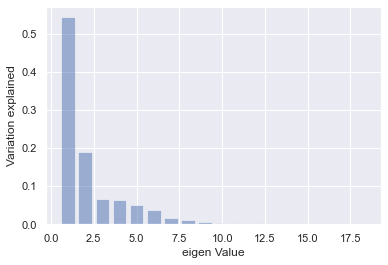

In [49]:
l = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
plt.bar(l,pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

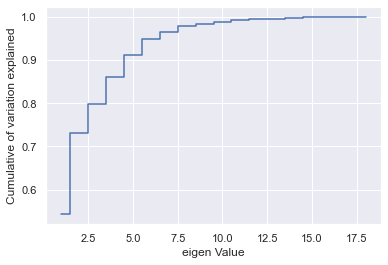

In [50]:
plt.step(l,np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative of variation explained')
plt.xlabel('eigen Value')
plt.show()

From the above plots, it can be observed that 6 dimensions are enough to explain over 95% of the variation of the original data

#### Dimentionality Reduction

In [51]:
pca6 = PCA(n_components=6)
pca6.fit(X_pca)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X_pca)

[[ 0.27260656  0.28592177  0.30145803  0.2722518   0.0964064   0.19319611
   0.31026667 -0.30848265  0.30798472  0.2766875   0.30294949  0.30793906
   0.26212568 -0.04154783  0.03737913  0.05907844  0.03300813  0.08038663]
 [-0.0890002   0.13129053 -0.04674956 -0.20638702 -0.2619632  -0.0988686
   0.07216022 -0.01066649  0.08473098  0.12338923  0.06982284  0.07751819
   0.20834811  0.50356412 -0.01426396 -0.0928999  -0.50058436 -0.5066036 ]
 [-0.01964978 -0.21227807  0.0720316   0.03622449 -0.12440344 -0.13860183
   0.11343097 -0.09037965  0.11081444 -0.22044188  0.14549215  0.1138646
  -0.21445874  0.0647963  -0.51086693  0.69358683 -0.05998388 -0.03853482]
 [ 0.13149885 -0.0190895   0.10542224 -0.25184572 -0.60243427  0.32068264
  -0.01138598  0.08231514  0.01423543  0.06727397 -0.07054128 -0.01780224
  -0.0696022  -0.13594278  0.50302053  0.37011826 -0.03285311  0.10339664]
 [ 0.15409809 -0.137963   -0.08389414  0.1198355   0.08064983 -0.62767914
   0.08169492 -0.07389638  0.0770641

In [52]:
Xpca6

array([[ 0.5765738 , -0.67313624, -0.58173563, -0.6546763 , -0.87208113,
        -1.8195271 ],
       [-1.53006041, -0.32597327, -0.23242844,  1.29954851, -0.29205403,
        -0.08837407],
       [ 3.9503759 ,  0.21192165, -1.22886658,  0.2069812 ,  0.90207064,
        -0.67128432],
       ...,
       [ 5.1608068 , -0.20697522, -0.61614358, -0.88873141, -1.34939098,
         0.23508814],
       [-3.32506479, -1.08078314,  1.93658988,  0.30843401, -0.53209586,
        -0.01674252],
       [-5.00449989,  0.45407385,  1.3191268 ,  0.17682595, -0.16500023,
         0.35117908]])

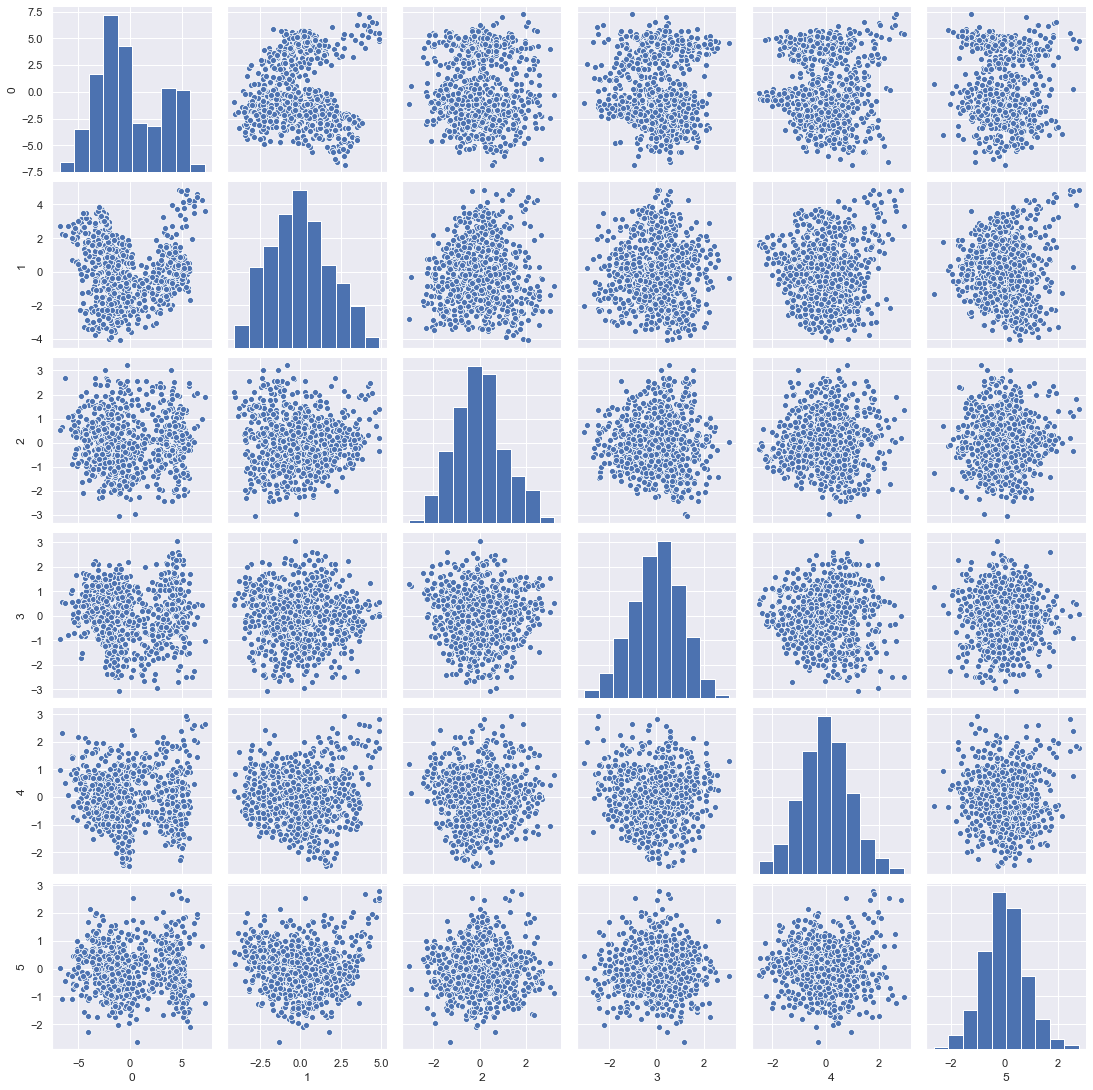

In [53]:
sns.pairplot(pd.DataFrame(Xpca6))

As depicted in the pairsplot above, there is no correlation between the independent variables

## Refitting SVM

In this section we will perform the follwoing steps:-
* Splitting data into training and testing set
* Refit the SVM model
* Perform K-Folds cross validation

#### Splitting data into train test split

In [54]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca6, y_pca, test_size = 0.3, random_state = 1)

In [55]:
y_train_pca

128    2
87     2
448    0
729    1
440    1
      ..
742    1
795    2
76     1
248    1
39     0
Name: class, Length: 569, dtype: category
Categories (3, int64): [0, 1, 2]

In [56]:
y_train

128    2
87     2
448    0
729    1
440    1
      ..
742    1
795    2
76     1
248    1
39     0
Name: class, Length: 569, dtype: category
Categories (3, int64): [0, 1, 2]

Y_train and y_train_pca are pointing to the same index.

Setting random_state = 1 to compute the accuracy scores after PCA transformation on the same set of data points as done earlier without PCA 

#### Refitting SVM

SVM model score (Training Data) with PCA: 0.9964850615114236
SVM model score (Testing Data) with PCA: 0.9346938775510204

SVC - Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        76
           1       0.97      0.92      0.94       119
           2       0.84      0.96      0.90        50

   micro avg       0.93      0.93      0.93       245
   macro avg       0.92      0.94      0.93       245
weighted avg       0.94      0.93      0.94       245



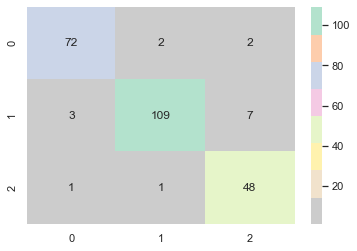

In [68]:
svm_model_pca = SVC(C = 30, degree = 3, gamma = "auto", kernel = "rbf")
svm_model_pca.fit(X_train_pca, y_train_pca)

svm_score_rbf_train_pca = svm_model_pca.score(X_train_pca, y_train_pca)
print('SVM model score (Training Data) with PCA:', svm_score_rbf_train_pca)

svm_score_rbf_pca = svm_model_pca.score(X_test_pca, y_test_pca)
print('SVM model score (Testing Data) with PCA:', svm_score_rbf_pca)

svm_pred_pca = svm_model_pca.predict(X_test_pca)

print("\nSVC - Classification Report")
class_report = classification_report(y_test_pca, svm_pred_pca, labels=[0,1,2])
print(class_report)

sns.heatmap(confusion_matrix(y_test_pca,svm_pred_pca), annot=True, cmap='Pastel2_r',fmt='g')

rep = classification_report(y_test_pca, svm_pred_pca, labels=[0,1,2], output_dict=True)
prec_bus_svm_pca = rep['0']['precision']
recall_bus_svm_pca = rep['0']['recall']
prec_car_svm_pca = rep['1']['precision']
recall_car_svm_pca = rep['1']['recall']
prec_van_svm_pca = rep['2']['precision']
recall_van_svm_pca = rep['2']['recall']

#### Performing K-fold cross val

In [58]:
scores = cross_val_score(svm_model_pca, Xpca6, y, cv = 10)
scores

array([0.93902439, 0.96341463, 0.8902439 , 0.92682927, 0.93902439,
       0.95121951, 0.91358025, 0.87654321, 0.96296296, 0.93670886])

In [59]:
svm_crossval_score_mean_pca = scores.mean()
print('SVM classifier cross val mean score after PCA transformation is:', svm_crossval_score_mean_pca)

SVM classifier cross val mean score after PCA transformation is: 0.9299551378073556


In [60]:
svm_crossval_score_std_pca = scores.std()
print('SVM classifier cross val standard deviation after PCA transformation is:', svm_crossval_score_std_pca)

SVM classifier cross val standard deviation after PCA transformation is: 0.027530106901110643


## Comparing Accuracy

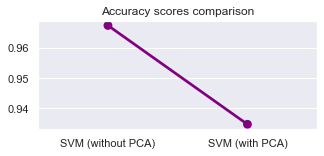

In [61]:
accu_scores = [svm_score_rbf, svm_score_rbf_pca]
legend = ['SVM (without PCA)', 'SVM (with PCA)']
plt.figure(figsize=(5, 2))
plt.title('Accuracy scores comparison')
sns.pointplot(legend, accu_scores, color= 'purple')

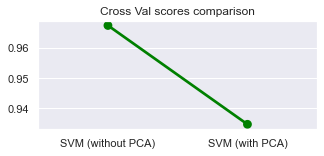

In [62]:
cv_scores = [svm_crossval_score_mean, svm_crossval_score_mean_pca]
legend = ['SVM (without PCA)', 'SVM (with PCA)']
plt.figure(figsize=(5, 2))
plt.title('Cross Val scores comparison')
sns.pointplot(legend, accu_scores, color= 'green')

In [66]:
print('The percentage drop in accurracy after reducing dimentions is {} %'
      .format(((svm_score_rbf-svm_score_rbf_pca)/svm_score_rbf)*100))

The percentage drop in accurracy after reducing dimentions is 3.3755274261603434 %


## Final Thoughts:

As we see there is only 3.3.% reduction in the accuracy of the model after transforming through PCA. The positives after using PCA is that we have lesser dimentions so computing is better, also PCA reduces overfitting.